## Logistic Regression

### 1.1 Imports

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2 Loading And Checking The Data

We will explore the Immunotherapy csv file. It contains numerical value columns. In the Result_of_Treatment column 1 represents a succesful treatment and 0 a failed one. We will try to classify treatments as successful or unseccessful given the other variables.

In [4]:
immunotherapy = pd.read_csv("Immunotherapy.c")

#### Check the data using head(), info(), and describe() methods

In [5]:
immunotherapy.head()

,Sex,Age,Time,Number_of_Warts,Type,Area,Induration_Diameter,Result_of_Treatment
0,Female,22,2.25,14,3,51,50,1
1,Female,15,3.00,2,3,900,70,1
2,Female,16,10.50,2,1,100,25,1
3,Female,27,4.50,9,3,80,30,1
4,Female,20,8.00,6,1,45,8,1


In [6]:
immunotherapy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
Sex                    90 non-null object
Age                    90 non-null int64
Time                   90 non-null float64
Number_of_Warts        90 non-null int64
Type                   90 non-null int64
Area                   90 non-null int64
Induration_Diameter    90 non-null int64
Result_of_Treatment    90 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.7+ KB


In [7]:
immunotherapy.describe

<bound method NDFrame.describe of        Sex  Age   Time  Number_of_Warts  Type  Area  Induration_Diameter  \
0   Female   22   2.25               14     3    51                   50   
1   Female   15   3.00                2     3   900                   70   
2   Female   16  10.50                2     1   100                   25   
3   Female   27   4.50                9     3    80                   30   
4   Female   20   8.00                6     1    45                    8   
5   Female   15   5.00                3     3    84                    7   
6   Female   35   9.75                2     2     8                    6   
7     Male   28   7.50                4     1     9                    2   
8     Male   19   6.00                2     1   225                    8   
9     Male   32  12.00                6     3    35                    5   
10    Male   33   6.25                2     1    30                    3   
11    Male   17   5.75               12     3    25   

#### Which column has the largest variance?

### 1.3 Data Exploration And Visualization

#### Use seaborn to create a countplot to visualize Result_of_Treatment

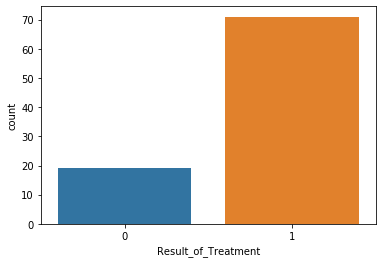

In [12]:
sns.countplot(immunotherapy['Result_of_Treatment'])

#### Create a variable sub_immunotherapy. Use immunotherapy.drop() to drop Area, Result_of_Treatment and Type columns and set axis=1.

In [15]:
sub_immunotherapy = immunotherapy.drop(immunotherapy[['Area', 'Result_of_Treatment', 'Type']], axis=1)

#### Use seaborn to create a boxplot of sub_immunotherapy

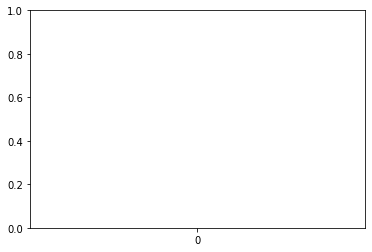

In [21]:
sns.boxplot()

Which feature had the biggest median?

Which features have a symmetric distribution?

#### Visualize the distribution of gender accross different types, use seaborn swarmplot()

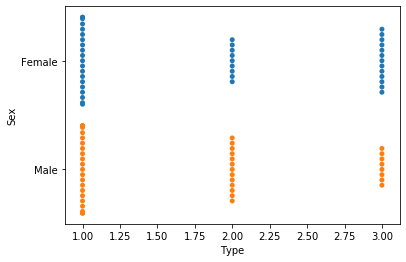

In [22]:
sns.swarmplot(x=immunotherapy['Type'], y=immunotherapy['Sex'])

### 1.4 Training And Testing Data

#### Set X equal to columns 'Age','Time','Area','Number_of_Warts','Type',and 'Induration_Diameter' and y to 'Result_of_Treatment'.

In [24]:
X = immunotherapy[['Age', 'Time', 'Area', 'Number_of_Warts', 'Type', 'Induration_Diameter']]
y = immunotherapy['Result_of_Treatment']

#### Import model_selection.train_test_split from sklearn. 

In [25]:
from sklearn.model_selection import train_test_split

#### Split the data into training set 80% and testing set 20% and set random_state = 0

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .2, random_state = 0)

#### Import LogisticRegression from sklearn.linear_model

In [29]:
from sklearn.linear_model import LogisticRegression

#### Create an instance of a LogisticRegression() model named lr.

In [35]:
lr = LogisticRegression(X, y)
lr.fit(X, y)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### Print out the coefficients of the model

In [ ]:
print()

### 1.5 Predicting Test Data

#### Use lr.predict() to predict the y_test off the X_test set of data

In [ ]:
prediction = 

### 1.6 Model Evaluation

#### To evaluate the performance of our model. Use lr.score() on X_test and y_test

#### Cross Validation

#### From sklearn.model_selection import cross_val_score  

In [ ]:
from sklearn.model_selection import 

#### The cross validation score will be the average of the scores. Print the cross validation score